In [1]:
from sklearn import tree

In [2]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt

In [25]:
from sklearn.tree import export_text

In [3]:
golf_df=pd.DataFrame()

In [5]:
golf_df["outlook"]=["sunny","sunny","overcast","rainy","rainy","rainy","overcast","sunny","sunny","rainy","sunny","overcast","overcast","rainy"]

In [6]:
golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool','mild','mild', 'mild', 'hot', 'mild']

In [7]:
golf_df["humidity"]=['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high','normal','normal', 'normal', 'high', 'normal', 'high']

In [8]:
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'false','false','true','true', 'false', 'true']

In [9]:
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes','yes', 'no']

In [22]:
golf_df

,Temperature,outlook,humidity,Windy,Play
0,hot,sunny,high,false,no
1,hot,sunny,high,true,no
2,hot,overcast,high,false,yes
3,mild,rainy,high,false,yes
4,cool,rainy,normal,false,yes
5,cool,rainy,normal,true,no
6,cool,overcast,normal,true,yes
7,mild,sunny,high,false,no
8,cool,sunny,normal,false,yes
9,mild,rainy,normal,false,yes


In [11]:
#converting variable datas into binary with the help of pd.get_dummies, each column individually gets converted
one_hot_data=pd.get_dummies(golf_df[["outlook","Temperature","humidity","Windy"]])

In [12]:
one_hot_data

,outlook_overcast,outlook_rainy,outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,humidity_high,humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [17]:
#decision tree
clf=tree.DecisionTreeClassifier()
clf_train=clf.fit(one_hot_data,golf_df["Play"])

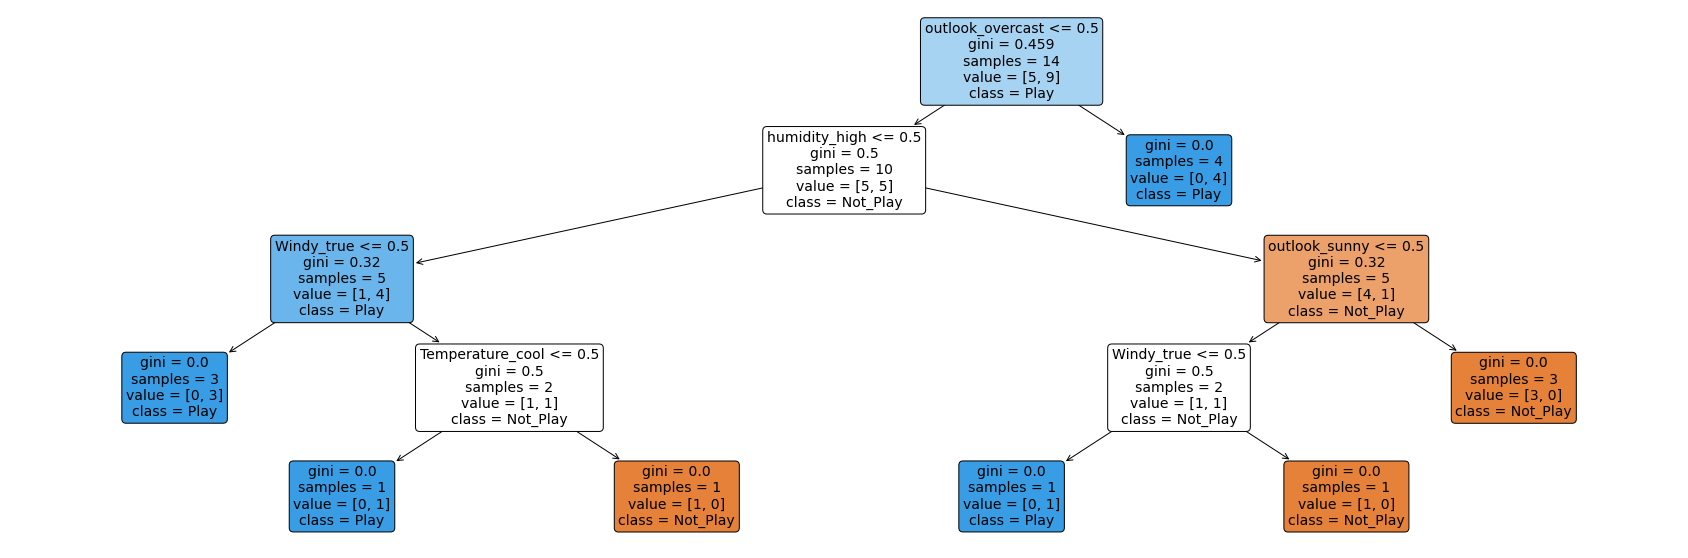

In [21]:
plt.figure(figsize=(30,10), facecolor ='white')

a = tree.plot_tree(clf,

                   feature_names = list(one_hot_data.columns.values),

                   class_names = ["Not_Play","Play"],

                   rounded = True,

                   filled = True,

                   fontsize=14)

plt.show()

In [26]:
tree_rules = export_text(clf,

                        feature_names = list(one_hot_data.columns.values))

print(tree_rules)

|--- outlook_overcast <= 0.50
|   |--- humidity_high <= 0.50
|   |   |--- Windy_true <= 0.50
|   |   |   |--- class: yes
|   |   |--- Windy_true >  0.50
|   |   |   |--- Temperature_cool <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- Temperature_cool >  0.50
|   |   |   |   |--- class: no
|   |--- humidity_high >  0.50
|   |   |--- outlook_sunny <= 0.50
|   |   |   |--- Windy_true <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- Windy_true >  0.50
|   |   |   |   |--- class: no
|   |   |--- outlook_sunny >  0.50
|   |   |   |--- class: no
|--- outlook_overcast >  0.50
|   |--- class: yes

